<h1>Trabajo</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4>Andrés Felipe Uribe García - 2160793
<br>Julián Orlando Rodríguez Villamizar - 2170137
<br>Isabel Cristina Gómez Balvin - 2171895 </h4>

<br>El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0
<br>
<br>Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.
<br>
<br>Las variables registradas son las siguientes:
<br>
<br>age - edad
<br>job- tipo de trabajo
<br>marital - estado civil
<br>education - nivel educativo
<br>default - crédito en incumplimiento
<br>housing - crédito de vivienda
<br>loan - préstamos personal
<br>contact - tipo de contacto realizado
<br>month - mes en que se hizo el último contacto
<br>day_of_week - último día de contacto de la semana
<br>duration - duración del último contacto, en segundos
<br>campaign - número de contactos realizados durante esta campaña y para este cliente
<br>pdays - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
<br>previous- número de contactos realizados antes de esta campaña y para este cliente
<br>poutcome - resultado de la campaña de marketing anterior
<br>emp.var.rate- tasa de variación del empleo - indicador trimestral
<br>cons.price.idx - índice de precios al consumidor - indicador mensual
<br>cons.conf.idx - índice de confianza del consumidor - indicador mensual
<br>euribor3m - euribor tasa de 3 meses - indicador diario
<br>nr.employed - número de empleados
<br>y - ¿el cliente ha suscrito un depósito a plazo?
<br>
<br>Los datos fueron tomados de: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS
</pr>

In [1]:
install.packages('samplingbook')
library(samplingbook)
library('SamplingUtil')
library(dplyr)
library(magrittr)
install.packages("bbmle")
library(bbmle)
install.packages("stats4")
library(stats4)
install.packages('rafalib')
library(rafalib)
library("readr")
ls() 

Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'samplingbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpoRUphz\downloaded_packages


Warning message:
"package 'samplingbook' was built under R version 4.0.2"
Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata



Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'bbmle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpoRUphz\downloaded_packages


Warning message:
"package 'bbmle' was built under R version 4.0.2"
Loading required package: stats4


Attaching package: 'bbmle'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'stats4' is in use and will not be installed"
Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rafalib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpoRUphz\downloaded_packages


character(0)

In [2]:
dataset <- read.csv("bank-additional-full.csv", header=TRUE,sep=";" )

In [3]:
#Rellenamos los espacios faltantes con su media correspondiente
#pues de omitirlos podriamos perder informacion importante
R<-data.frame(#Variables continuas
                Edad=dataset$age,
                Camp=dataset$campaign,
                NDias=dataset$pdays,
                TVE=dataset$emp.var.rate,
                IPC=dataset$cons.price.idx,
                ICC=dataset$cons.conf.idx,
                Eu=dataset$euribor3m,
                NE=dataset$nr.employed,
                Dur=dataset$duration,
    
              #Variables No Continuas
                Trab=dataset$job,
                EstCv=dataset$marital,
                NvEduc=dataset$education,
                CredInc=dataset$default,
                CredViv=dataset$housing,
                CredPer=dataset$loan,
                Cont=dataset$contact,
                Mes=dataset$month,
                Dia=dataset$day_of_week,
                NPrev=dataset$previous,
                RPrev=dataset$poutcome,
                Sus=dataset$y)

#sum(is.na(R$Edad))
#sum(is.na(R$Trab))
#sum(is.na(R$EstCv))
#sum(is.na(R$NvEduc))
#sum(is.na(R$CredInc))
#sum(is.na(R$CredViv))
#sum(is.na(R$CredPer))
#sum(is.na(R$Cont))
#sum(is.na(R$Mes))
#sum(is.na(R$Dia))
#sum(is.na(R$Dur))
#sum(is.na(R$Camp))
#sum(is.na(R$NDias))
#sum(is.na(R$NPrev))
#sum(is.na(R$RPrev))
#sum(is.na(R$TVE))
#sum(is.na(R$IPC))
#sum(is.na(R$ICC))
#sum(is.na(R$Eu))
#sum(is.na(R$NE))
#sum(is.na(R$Sus))
#No hay que limpiar

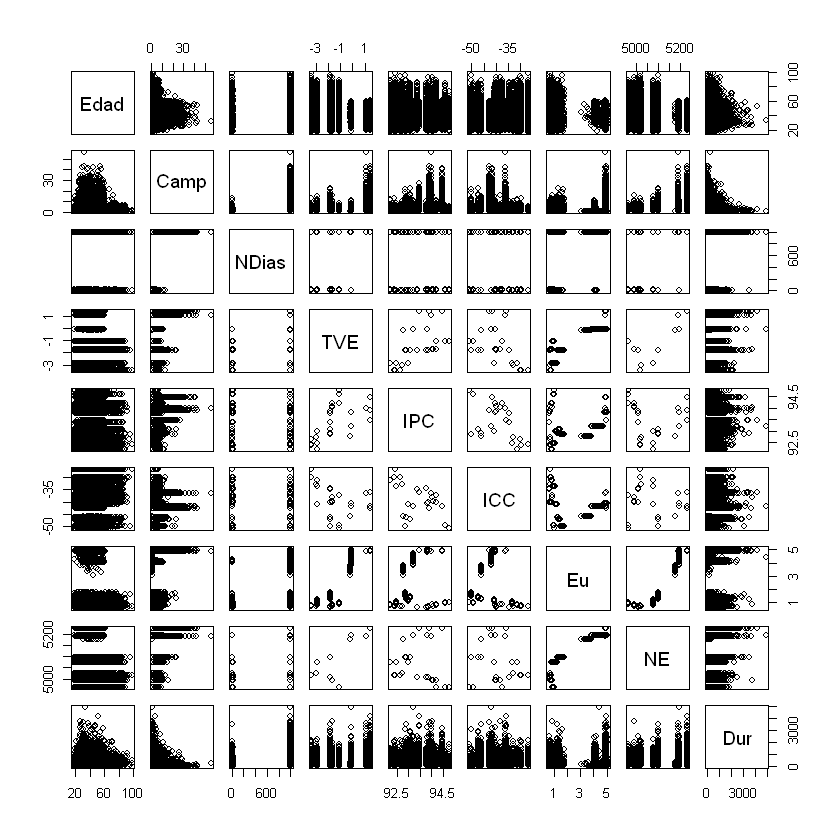

In [4]:
# Hagamos una rápida inspección gráfica. Primero, sólo con las variables continuas
plot(R[,1:9])

In [5]:
head(R)
tail(R)

,Edad,Camp,NDias,TVE,IPC,ICC,Eu,NE,Dur,Trab,...,NvEduc,CredInc,CredViv,CredPer,Cont,Mes,Dia,NPrev,RPrev,Sus
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,56,1,999,1.1,93.994,-36.4,4.857,5191,261,housemaid,...,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,no
2,57,1,999,1.1,93.994,-36.4,4.857,5191,149,services,...,high.school,unknown,no,no,telephone,may,mon,0,nonexistent,no
3,37,1,999,1.1,93.994,-36.4,4.857,5191,226,services,...,high.school,no,yes,no,telephone,may,mon,0,nonexistent,no
4,40,1,999,1.1,93.994,-36.4,4.857,5191,151,admin.,...,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,no
5,56,1,999,1.1,93.994,-36.4,4.857,5191,307,services,...,high.school,no,no,yes,telephone,may,mon,0,nonexistent,no
6,45,1,999,1.1,93.994,-36.4,4.857,5191,198,services,...,basic.9y,unknown,no,no,telephone,may,mon,0,nonexistent,no


,Edad,Camp,NDias,TVE,IPC,ICC,Eu,NE,Dur,Trab,...,NvEduc,CredInc,CredViv,CredPer,Cont,Mes,Dia,NPrev,RPrev,Sus
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
41183,29,1,9,-1.1,94.767,-50.8,1.028,4963.6,112,unemployed,...,basic.4y,no,yes,no,cellular,nov,fri,1,success,no
41184,73,1,999,-1.1,94.767,-50.8,1.028,4963.6,334,retired,...,professional.course,no,yes,no,cellular,nov,fri,0,nonexistent,yes
41185,46,1,999,-1.1,94.767,-50.8,1.028,4963.6,383,blue-collar,...,professional.course,no,no,no,cellular,nov,fri,0,nonexistent,no
41186,56,2,999,-1.1,94.767,-50.8,1.028,4963.6,189,retired,...,university.degree,no,yes,no,cellular,nov,fri,0,nonexistent,no
41187,44,1,999,-1.1,94.767,-50.8,1.028,4963.6,442,technician,...,professional.course,no,no,no,cellular,nov,fri,0,nonexistent,yes
41188,74,3,999,-1.1,94.767,-50.8,1.028,4963.6,239,retired,...,professional.course,no,yes,no,cellular,nov,fri,1,failure,no
